In [1]:
import os
import pandas as pd

# Define the directories
input_dir = 'own/truth/'
output_dir = 'own/truth-rel/'

# Function to convert lat/lon to relative x, y coordinates
def latlon_to_xy(lat, lon, lat0, lon0):
    from math import radians, cos, sin, sqrt, atan2
    
    # Radius of the Earth in meters
    R = 6378137.0
    
    # Convert degrees to radians
    lat, lon, lat0, lon0 = map(radians, [lat, lon, lat0, lon0])
    
    # Compute x, y coordinates
    dlon = lon - lon0
    dlat = lat - lat0
    x = R * dlon * cos((lat + lat0) / 2)
    y = R * dlat
    
    return x, y

# Process each CSV file in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.csv'):
        input_filepath = os.path.join(input_dir, filename)
        output_filepath = os.path.join(output_dir, filename)
        
        # Read the CSV file
        df = pd.read_csv(input_filepath)
        
        # Get the reference point (first point)
        lat0, lon0 = df['lat'].iloc[0], df['lon'].iloc[0]
        
        # Convert lat/lon to x/y coordinates
        df['x'], df['y'] = zip(*df.apply(lambda row: latlon_to_xy(row['lat'], row['lon'], lat0, lon0), axis=1))
        
        # Keep only the necessary columns
        df = df[['time', 'x', 'y']]
        
        # Ensure all coordinates are positive
        df['x'] = df['x'] - df['x'].min()
        df['y'] = df['y'] - df['y'].min()
        
        # Save the resulting CSV file
        df.to_csv(output_filepath, index=False)


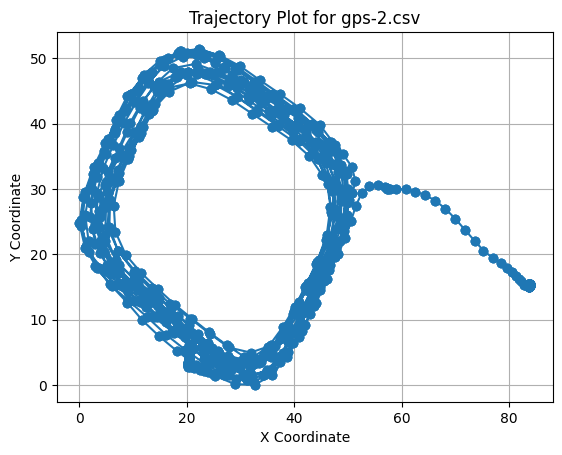

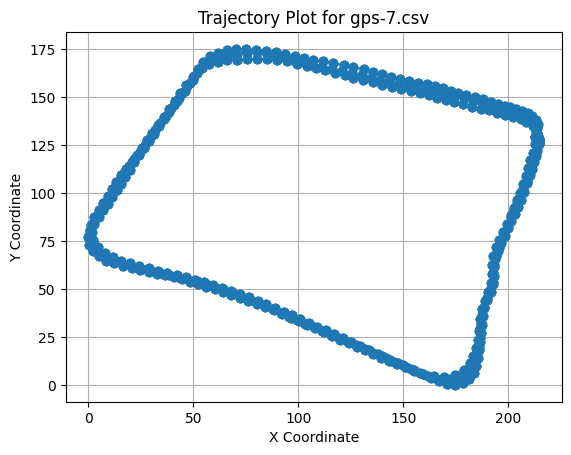

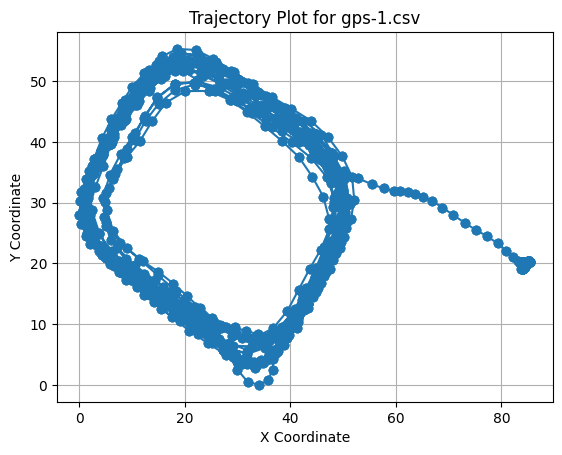

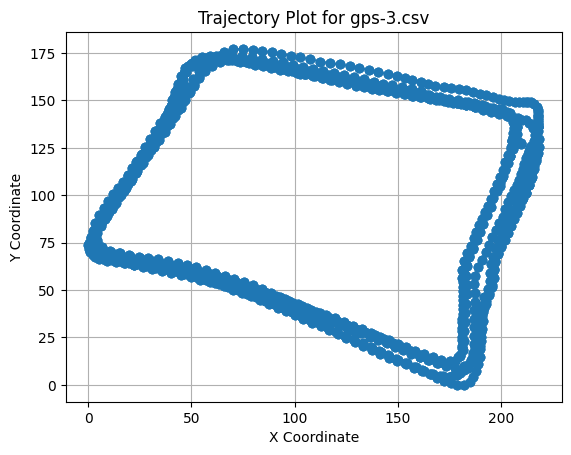

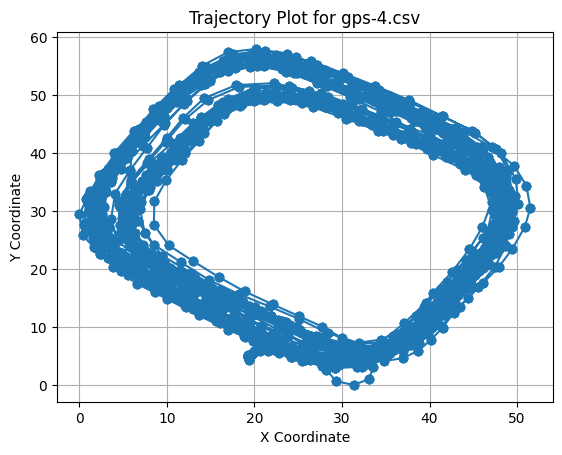

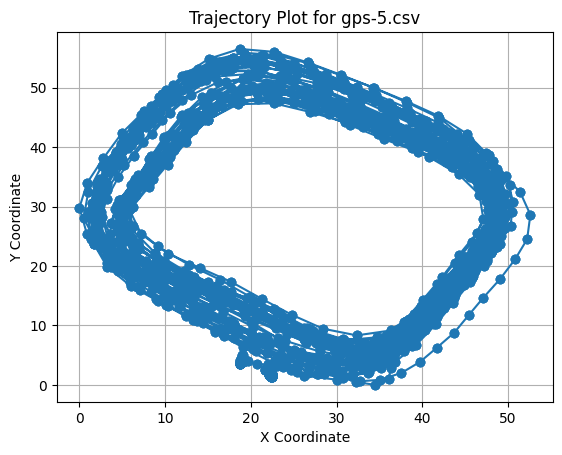

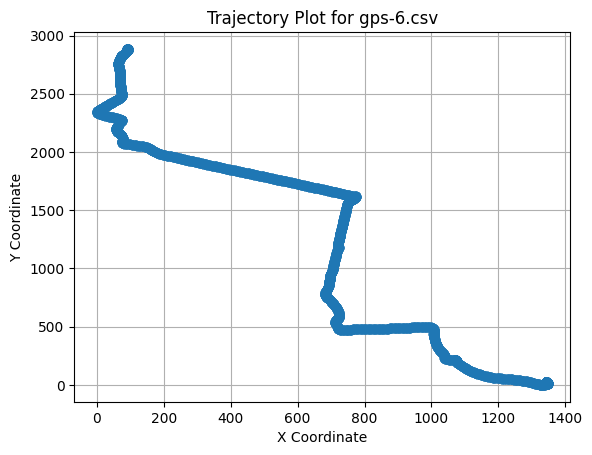

In [2]:
import matplotlib.pyplot as plt

# Define the directory containing the processed CSV files
processed_dir = 'own/truth-rel/'

# Function to plot x, y coordinates from a CSV file
def plot_xy(filename, df):
    plt.figure()
    plt.plot(df['x'], df['y'], marker='o')
    plt.title(f'Trajectory Plot for {filename}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()

# Process each CSV file in the processed directory
for filename in os.listdir(processed_dir):
    if filename.endswith('.csv'):
        filepath = os.path.join(processed_dir, filename)
        
        # Read the CSV file
        df = pd.read_csv(filepath)
        
        # Plot the x, y coordinates
        plot_xy(filename, df)
